## Notebook setup- Installing Packages and Imports

In [1]:
%pip install pandas-datareader
%pip install cufflinks
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Imports

In [2]:
# data analysis and wrangling
import pandas as pd
from pandas_datareader import data
import numpy as np
import random as rnd
import datetime
import yfinance
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import cufflinks as cf
cf.go_offline()

In [3]:
# Getting the data via yahoo finance
import yfinance as yf

start = "2006-01-01"
end = "2024-01-01"

""" 
Bank of America (BAC)
CitiGroup (C)
Goldman Sachs (GS)
JPMorgan Chase (JPM)
Morgan Stanley (MS)
Wells Fargo (WFC)
"""

BAC = yf.download("BAC", start=start, end=end)
C = yf.download("C", start=start, end=end)
GS = yf.download("GS", start=start, end=end)
JPM = yf.download("JPM", start=start, end=end)
MS = yf.download("MS", start=start, end=end)
WFC = yf.download("WFC", start=start, end=end)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
# preview one dataframe
BAC.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2006-01-03  46.919998  47.180000  46.150002  47.080002  31.943666  16296700
2006-01-04  47.000000  47.240002  46.450001  46.580002  31.604437  17757900
2006-01-05  46.580002  46.830002  46.320000  46.639999  31.645136  14970700
2006-01-06  46.799999  46.910000  46.349998  46.570000  31.597641  12599800
2006-01-09  46.720001  46.970001  46.360001  46.599998  31.617987  15619400

In [5]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [6]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
# bank_stocks

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  31.943666  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  31.604437  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  31.645136  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  31.597641  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  31.617987  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.259651  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  33.282459  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  33.373722  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  33.407936  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  33.761581  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.234493  11016400  
2006-01-04   31.530001  19.011398  10870000  
2006-01-05   31.495001  18.990288  10158000  
2006-01-06   31.680000  19.101837   8403800  
2006-01-09   31.674999  19.098829   5619600  

[5 rows x 36 columns]

# 1. Exploratory Data Analysis

In [8]:
# Max close price throughout time period
bank_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     423.850006
JPM    171.779999
MS     108.730003
WFC     65.930000
dtype: float64

In [9]:
# Date of highest price for Citigroup stock
C['Close'].idxmax()

Timestamp('2006-12-27 00:00:00')

In [10]:
# empty dataframe to contain the returns for each stock
returns = pd.DataFrame()

In [11]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head(3)

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110

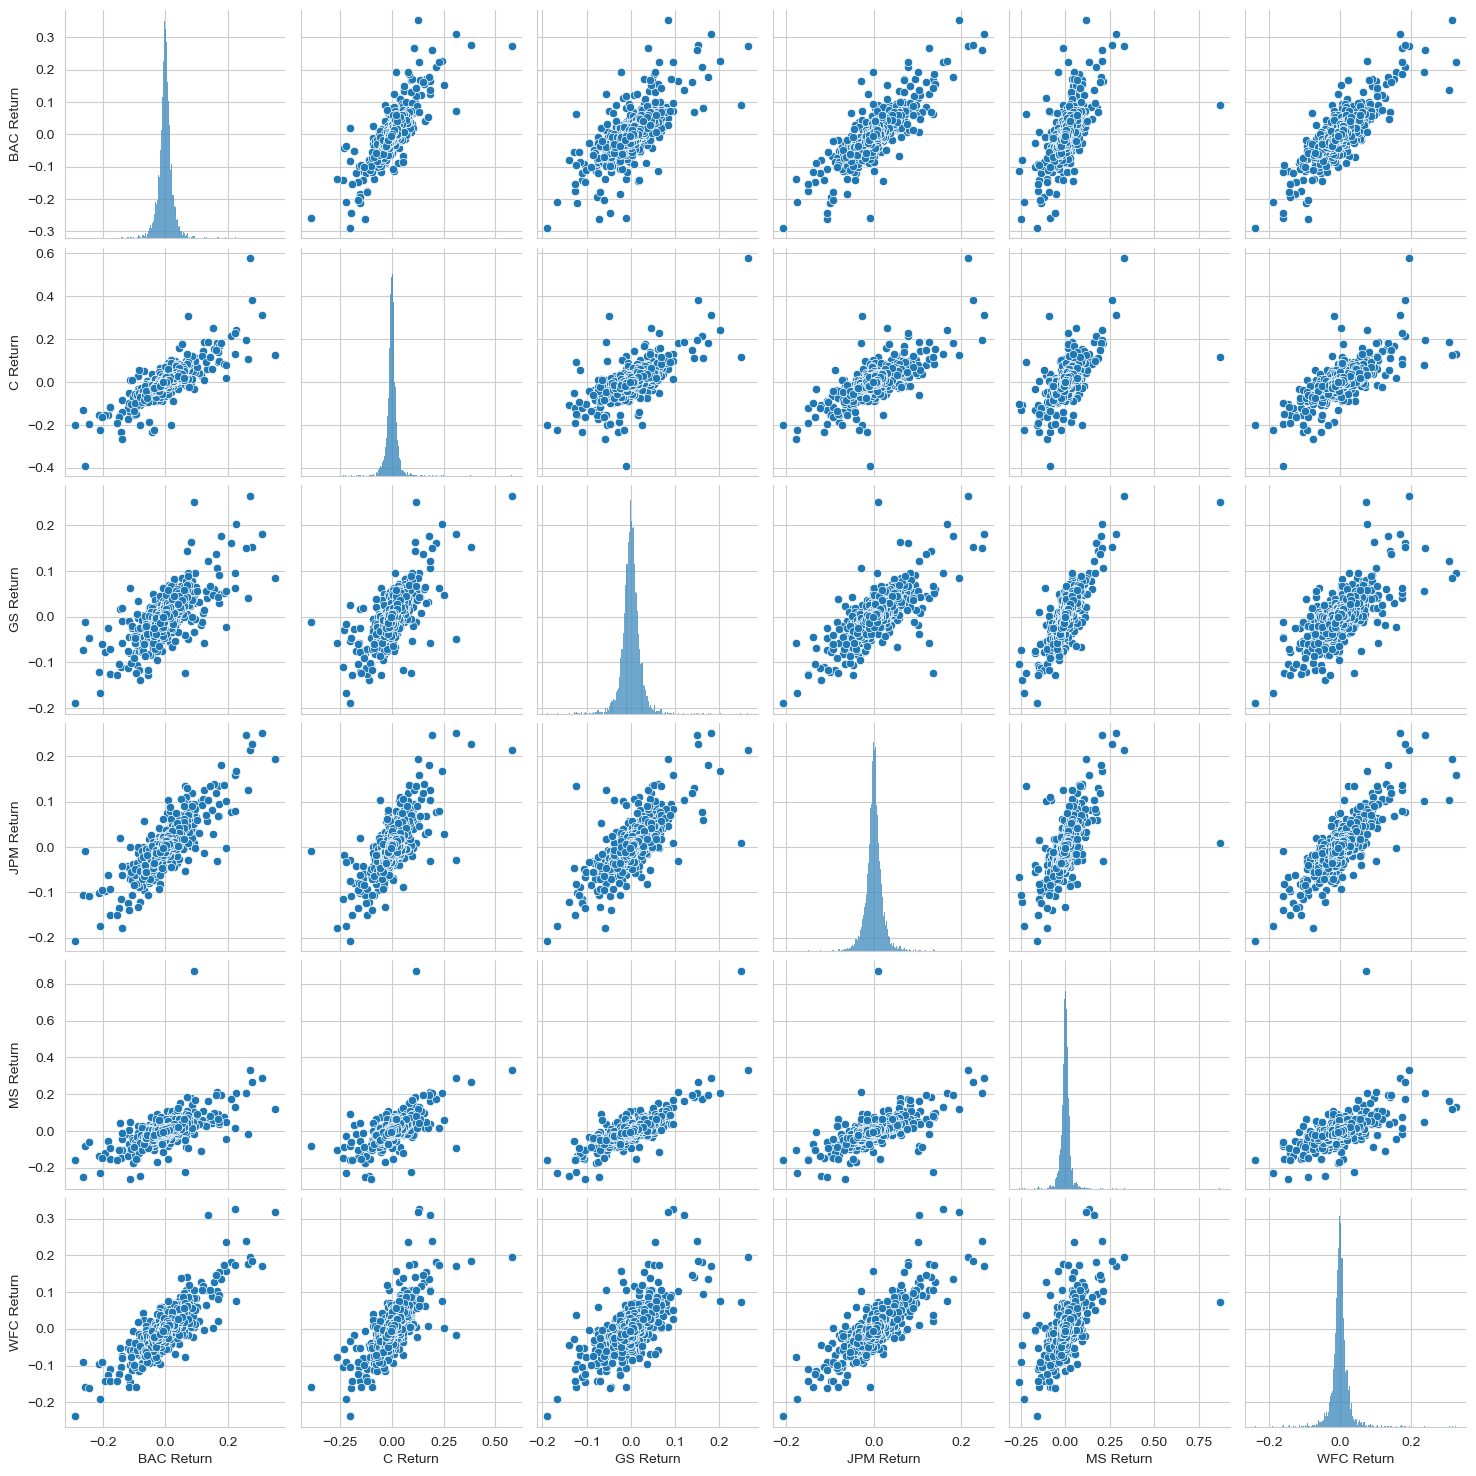

In [12]:
sns.pairplot(returns[1:])

In [13]:
# Biggest single day losses
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

## 1.1 Standard Deviation

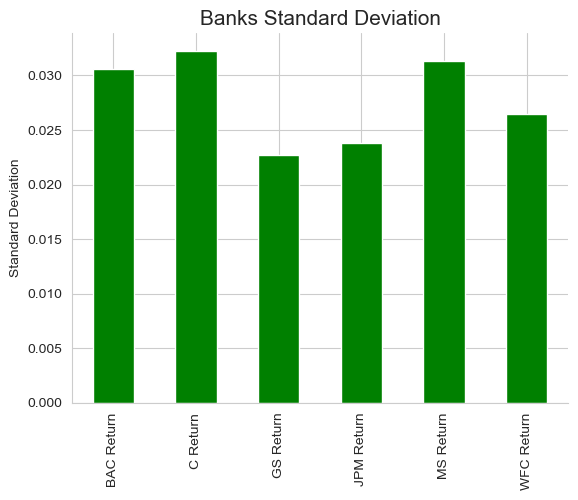

In [14]:
# Standard Deviation 
returns.std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('Banks Standard Deviation', fontsize=15)
sns.despine()

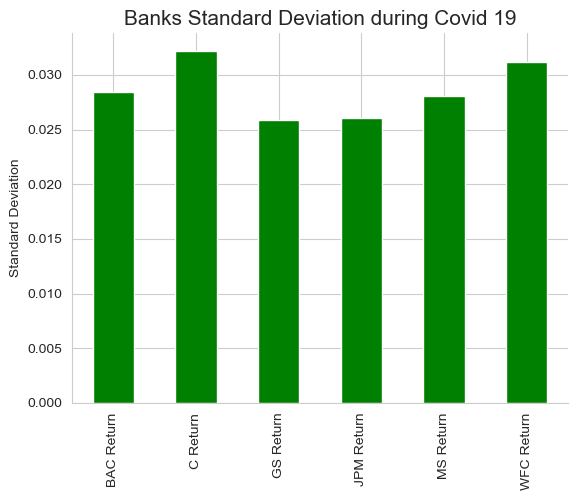

In [15]:
# Covid-19 Standard Deviation
returns.loc['2020-01-01':'2021-12-31'].std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('Banks Standard Deviation during Covid 19', fontsize=15)
sns.despine()

Text(0, 0.5, 'Numbers of Returns')

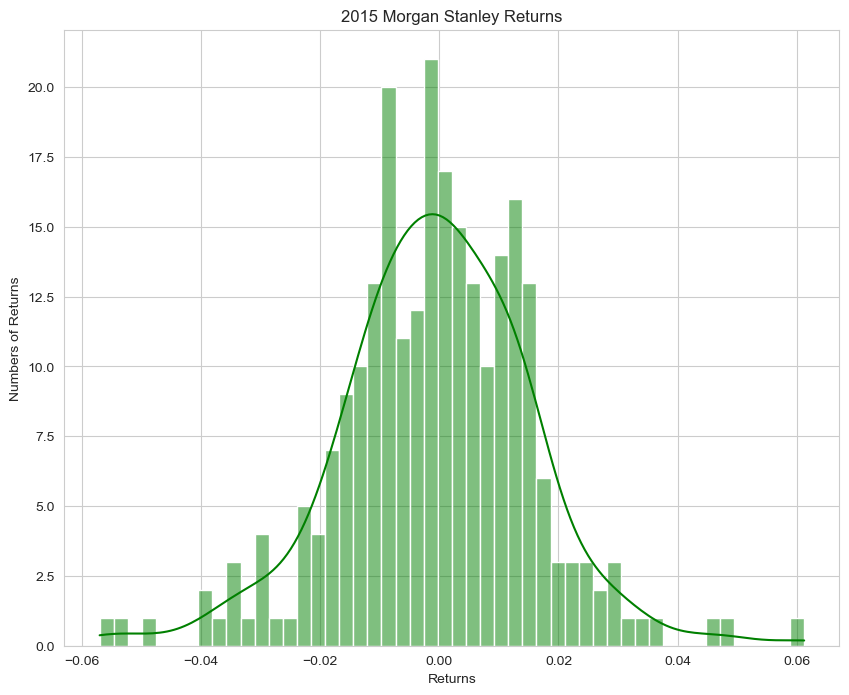

In [16]:
plt.figure(figsize=(10,8))
ax = sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50, kde = True)
ax.set_title('2015 Morgan Stanley Returns')
ax.set_xlabel('Returns')
ax.set_ylabel('Numbers of Returns')

Text(0, 0.5, 'Numbers of Returns')

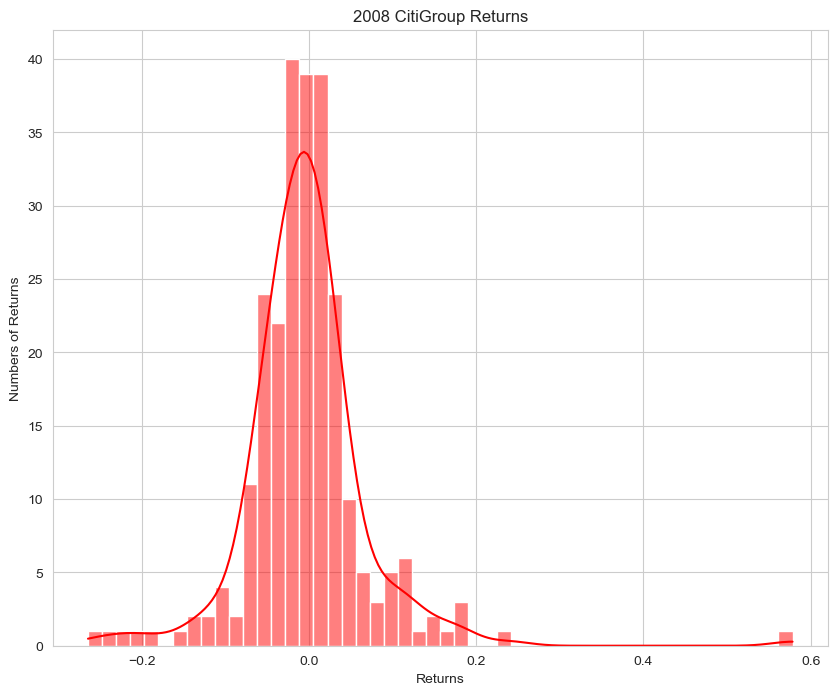

In [17]:
plt.figure(figsize=(10,8))
ax = sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50, kde = True)
ax.set_title('2008 CitiGroup Returns')
ax.set_xlabel('Returns')
ax.set_ylabel('Numbers of Returns')

## 1.2 Pearson Correlation Matrix

<AxesSubplot:title={'center':'Pearson Correlation Matrix'}, xlabel='Bank Ticker', ylabel='Bank Ticker'>

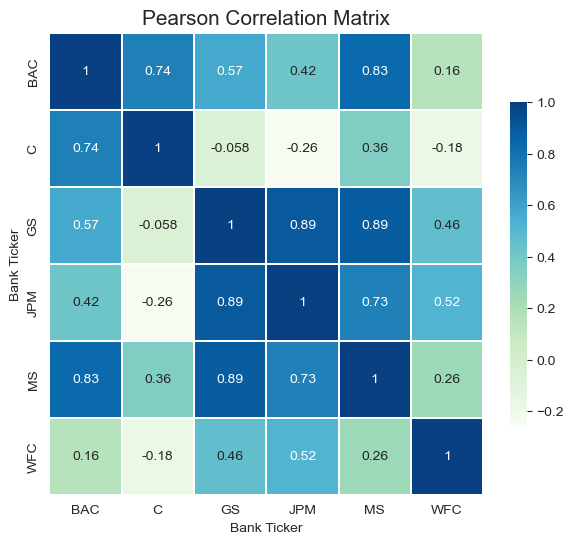

In [18]:
plt.figure(figsize=(7,6))
plt.title('Pearson Correlation Matrix',fontsize=15)
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='GnBu',
            linewidths=0.25, linecolor='w', cbar_kws={"shrink": .7})

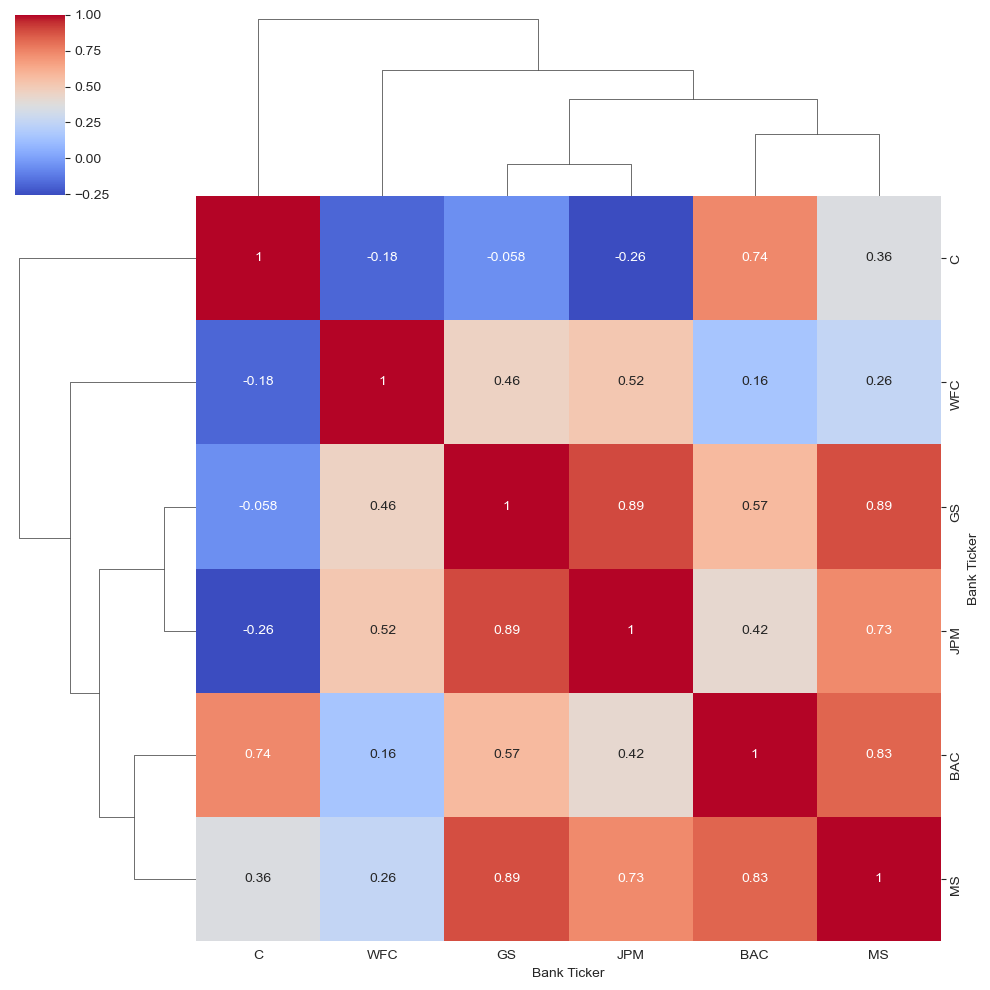

In [19]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm')

# 2. Financial Charts

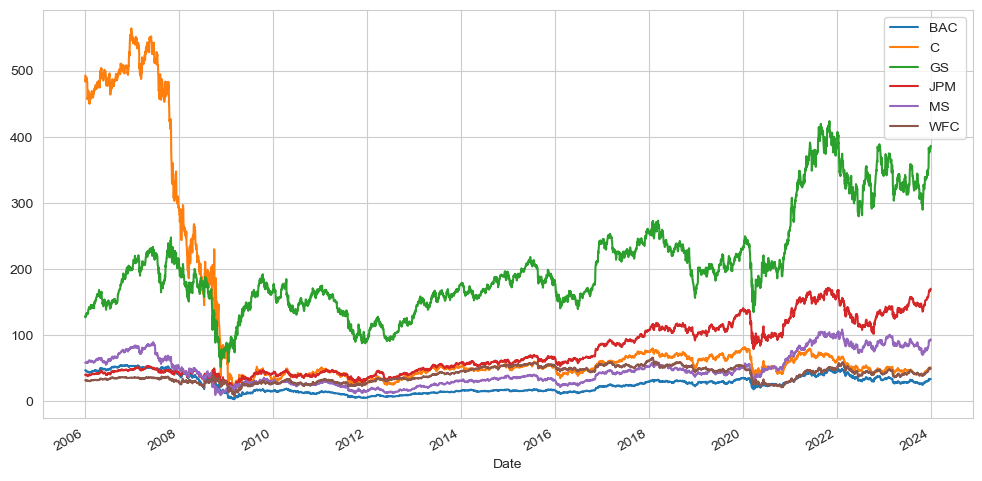

In [20]:
# Option N°1
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,6))
plt.legend()

<AxesSubplot:xlabel='Date'>

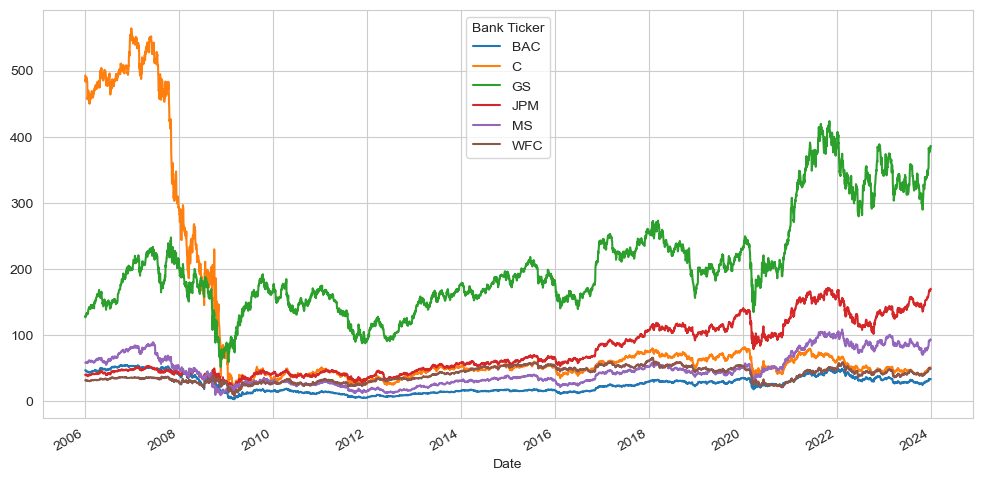

In [21]:
# Option N°2
bank_stocks.xs('Close', axis=1, level='Stock Info').plot(figsize=(12,6))

In [22]:
# Option N°3
bank_stocks.xs('Close', axis=1, level='Stock Info').iplot(xTitle='Date', yTitle='Close Price', title='Cufflinks - Close Price for Each Bank')

## 2.1 Return. Histograms

In [23]:
fig = make_subplots(rows=3, cols=2)

trace0 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['BAC Return'], nbinsx=50, name="BAC")
trace1 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['C Return'], nbinsx=50, name="C")
trace2 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['GS Return'], nbinsx=50, name="GS")
trace3 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['JPM Return'], nbinsx=50, name="JPM")
trace4 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['MS Return'], nbinsx=50, name="MS")
trace5 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['WFC Return'], nbinsx=50, name="WFC")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(title_text='Banks Returns (2018 - 2019)')

fig.show()

## 1.2 Moving Averages (MA)

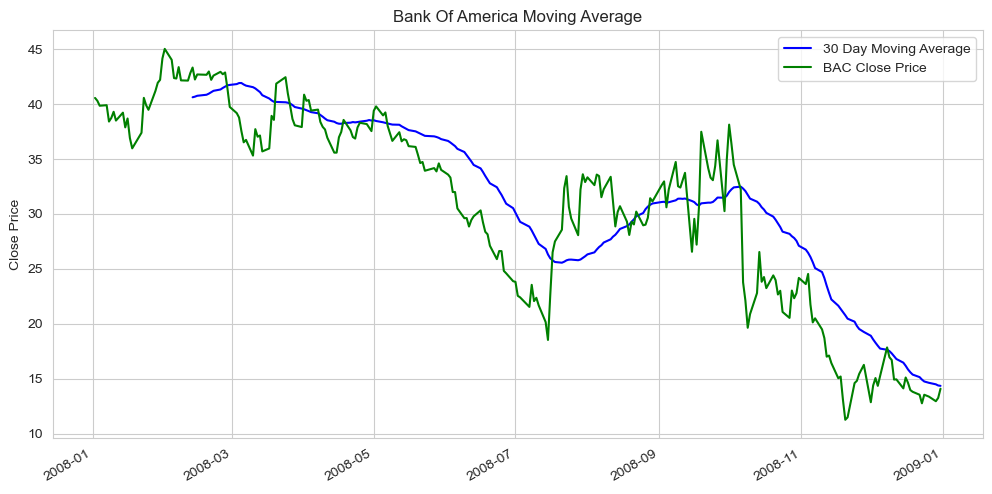

In [24]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(color='blue', label='30 Day Moving Average')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(color='green', label='BAC Close Price')
plt.ylabel('Close Price')
plt.xlabel('')
plt.title('Bank Of America Moving Average')
plt.legend()


In [25]:
BAC['Close'].loc['2008-01-01':'2008-12-31'].iplot(fill=True,colors=['green'])

## 1.3 Simple Moving Averages (SMA)

In [26]:
MS.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='sma', periods=[13,21,55])

## 1.4 Candlestick Charts 

In [27]:
# Bank of America Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=BAC.index,
                open=BAC['Open'],
                high=BAC['High'],
                low=BAC['Low'], 
                close=BAC['Close'])
                ])

fig.update_layout(
    title='Bank of Amercia Stock Price',
    yaxis_title='BAC Stock',
    shapes = [dict(
        x0='2009-01-20', x1='2009-01-20', y0=0, y1=1, xref='x', yref='paper', line_width=2),
             dict(
        x0='2007-12-01', x1='2007-12-01', y0=0, y1=1, xref='x', yref='paper', line_width=2),
             dict(
        x0='2020-03-01', x1='2020-03-01', y0=0, y1=1, xref='x', yref='paper', line_width=2)],
    annotations=[dict(
        x='2009-01-20', y=0.95, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='US President Obama Took Office'), 
                 dict(
        x='2007-12-01', y=0.1, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='2008 Mortgage Crisis'),
                dict(
        x='2020-03-01', y=0.1, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Covid-19')]
    
)

fig.show()

In [28]:
# Bank of America Candlestick Chart
BAC[['Open', 'High', 'Close', 'Low']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle', 
                                                                           title='Bank of Amercia Stock Price', 
                                                                           yaxis_title='BAC Stock')

## 1.5 Bollinger Band 

In [29]:
BAC.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='boll',periods=14, title='Bollinger Bands')

## 1.6 Bank Facet plot

In [30]:
fig = px.area(bank_stocks.xs(key='Close', axis=1, level='Stock Info'), facet_col="Bank Ticker", facet_col_wrap=2)
fig.show()

## 1.7 OLHC Chart

In [31]:
# Citigroup OHLC Chart
fig = go.Figure(data=go.Ohlc(x=C.index,
                    open=C['Open'],
                    high=C['High'],
                    low=C['Low'],
                    close=C['Close']))

fig.update_layout(
    title='Citigroup Stock Price',
    yaxis_title='C Stock',
    shapes = [dict(
        x0='2009-01-20', x1='2009-01-20', y0=0, y1=1, xref='x', yref='paper', line_width=2),
             dict(
        x0='2007-12-01', x1='2007-12-01', y0=0, y1=1, xref='x', yref='paper', line_width=2),
             dict(
        x0='2020-03-01', x1='2020-03-01', y0=0, y1=1, xref='x', yref='paper', line_width=2)],
    annotations=[dict(
        x='2009-01-20', y=0.95, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='US President Obama Took Office'), 
                 dict(
        x='2007-12-01', y=0.1, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='2008 Mortgage Crisis'),
                dict(
        x='2020-03-01', y=0.95, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Covid-19')]
    
)

fig.show()